In [1]:
# Import libraries

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

class_names = ['0', '1', '2',
               '2', '4', '5', '6',
               '7', '8', '9']

import tensorflow

y_train_cat = tensorflow.keras.utils.to_categorical(y_train, num_classes=10)
y_test_cat = tensorflow.keras.utils.to_categorical(y_test, num_classes=10)


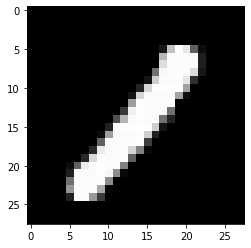

In [3]:
import random

plt.figure()
plt.imshow(x_train[random.randint(0, len(x_train)),:,:,:], cmap="gray")

In [4]:
import keras

# Build three models
# Model 1
# Defining the CNN 
model1 = Sequential()

model1.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(64, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Conv2D(128, (3, 3), activation='relu'))
model1.add(MaxPooling2D(pool_size = (2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())

model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(10, activation = 'softmax'))

# Model compile
model1.compile(optimizer=keras.optimizers.Adam(0.0001),
               loss=keras.losses.categorical_crossentropy,
               metrics=['accuracy'])
model1.summary()

# Callback
checkpointer = keras.callbacks.ModelCheckpoint('model1_MNIST.hdf5', verbose=1, save_best_only=True)

callbacks = keras.callbacks.EarlyStopping(patience=5, monitor='loss')

# Fitting
history1 = model1.fit(x_train, y_train_cat, 
                      batch_size = 128, epochs = 10, 
                      verbose = 1, validation_data = (x_test, y_test_cat), 
                      callbacks=[callbacks, checkpointer])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [5]:
# Model 2

model2 = Sequential()

model2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model2.add(Conv2D(32, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(Conv2D(25, (1,1)))

model2.add(Flatten())

model2.add(Dense(10, activation = 'softmax'))

model2.compile(optimizer=keras.optimizers.Adam(0.0001),
               loss=keras.losses.categorical_crossentropy,
               metrics=['accuracy'])
model2.summary()

# Callback
checkpointer = keras.callbacks.ModelCheckpoint('model2_MNIST.hdf5', verbose=1, save_best_only=True)

history2 = model2.fit(x_train, y_train_cat, 
                      batch_size = 128, epochs = 10, 
                      verbose = 1, validation_data = (x_test, y_test_cat), 
                      callbacks=[callbacks, checkpointer])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_4 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_6 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 conv2d_7 (Conv2D)           (None, 6, 6, 64)          36928     
                                                      

In [6]:
#Model 3

model3 = Sequential()

model3.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size = (2, 2)))
model3.add(Dropout(0.2))

model3.add(Flatten())

model3.add(Dense(10, activation = 'softmax'))

model3.compile(optimizer=keras.optimizers.Adam(0.0001),
               loss=keras.losses.categorical_crossentropy,
               metrics=['accuracy'])
model3.summary()

# Set callbacks
checkpointer = keras.callbacks.ModelCheckpoint('model3_MNIST.hdf5', verbose=1, save_best_only=True)

history3 = model3.fit(x_train, y_train_cat, 
                      batch_size = 128, epochs = 10, 
                      verbose = 1, validation_data = (x_test, y_test_cat), 
                      callbacks=[callbacks, checkpointer])


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 5, 5, 64)         

In [3]:
from keras.models import load_model

model1 = load_model('model1_MNIST.hdf5')
model2 = load_model('model2_MNIST.hdf5')
model3 = load_model('model3_MNIST.hdf5')

In [11]:
# Ensemble models
from sklearn.metrics import accuracy_score

models = [model1, model2, model3]

preds = [model.predict(x_test) for model in models]
preds = np.array(preds)
summed = np.sum(preds, axis=0)

# argmax across classes
ensemble_prediction = np.argmax(summed, axis=1)

prediction1 = np.argmax(model1.predict(x_test), axis=1)
prediction2 = np.argmax(model2.predict(x_test), axis=1)
prediction3 = np.argmax(model3.predict(x_test), axis=1)

accuracy1 = accuracy_score(y_test, prediction1)
accuracy2 = accuracy_score(y_test, prediction2)
accuracy3 = accuracy_score(y_test, prediction3)
ensemble_accuracy = accuracy_score(y_test, ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)

313/313 [==============================] - 1s 3ms/step
Accuracy Score for model1 =  0.976
Accuracy Score for model2 =  0.9896
Accuracy Score for model3 =  0.979
Accuracy Score for average ensemble =  0.987


In [13]:
#Weighted average ensemble
#Grid search for the best combination of w1, w2, w3 that gives maximum acuracy
preds1 = [model.predict(x_test) for model in models]
preds1=np.array(preds1)

import pandas as pd
df = pd.DataFrame([])

for w1 in range(0, 5):
    for w2 in range(0,5):
        for w3 in range(0,5):
            wts = [w1/10.,w2/10.,w3/10.]
            wted_preds1 = np.tensordot(preds1, wts, axes=((0),(0)))
            wted_ensemble_pred = np.argmax(wted_preds1, axis=1)
            weighted_accuracy = accuracy_score(y_test, wted_ensemble_pred)
            df = df.append(pd.DataFrame({'wt1':wts[0],'wt2':wts[1], 
                                         'wt3':wts[2], 'acc':weighted_accuracy*100}, index=[0]), ignore_index=True)
            
max_acc_row = df.iloc[df['acc'].idxmax()]
print("Max accuracy of ", max_acc_row[0], " obained with w1=", max_acc_row[1],
      " w2=", max_acc_row[2], " and w3=", max_acc_row[3])         


313/313 [==============================] - 1s 4ms/step
Max accuracy of  0.1  obained with w1= 0.4  w2= 0.0  and w3= 99.00999999999999


In [17]:
print(df.head())
print(max_acc_row.head())

   wt1  wt2  wt3   acc
0  0.0  0.0  0.0   9.8
1  0.0  0.0  0.1  97.9
2  0.0  0.0  0.2  97.9
3  0.0  0.0  0.3  97.9
4  0.0  0.0  0.4  97.9
wt1     0.10
wt2     0.40
wt3     0.00
acc    99.01
Name: 45, dtype: float64


In [25]:
preds = [model.predict(x_test) for model in models]
preds=np.array(preds)
ideal_weights = [0.1, 0.4, 0.01] 

#Use tensordot to sum the products of all elements over specified axes.
weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
weighted_ensemble_prediction = np.argmax(weighted_preds, axis=1)

weighted_accuracy = accuracy_score(y_test, weighted_ensemble_prediction)

print('Accuracy Score for model1 = ', accuracy1)
print('Accuracy Score for model2 = ', accuracy2)
print('Accuracy Score for model3 = ', accuracy3)
print('Accuracy Score for average ensemble = ', ensemble_accuracy)
print('Accuracy Score for weighted average ensemble = ', weighted_accuracy)

313/313 [==============================] - 1s 4ms/step
Accuracy Score for model1 =  0.976
Accuracy Score for model2 =  0.9896
Accuracy Score for model3 =  0.979
Accuracy Score for average ensemble =  0.987
Accuracy Score for weighted average ensemble =  0.99


Predicted Label:  6
True Label:  6


([<matplotlib.axis.XTick at 0x1a018ac9d30>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '2'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9')])

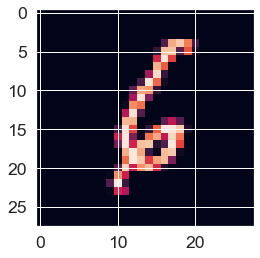

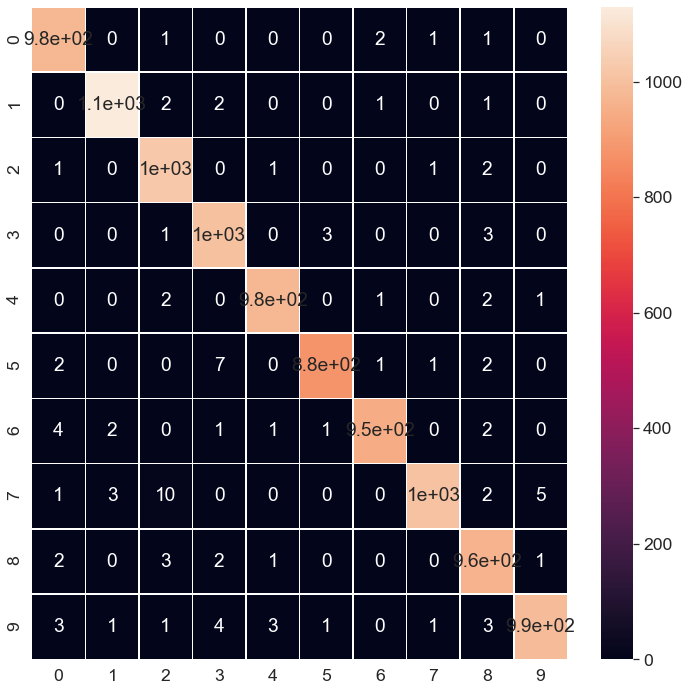

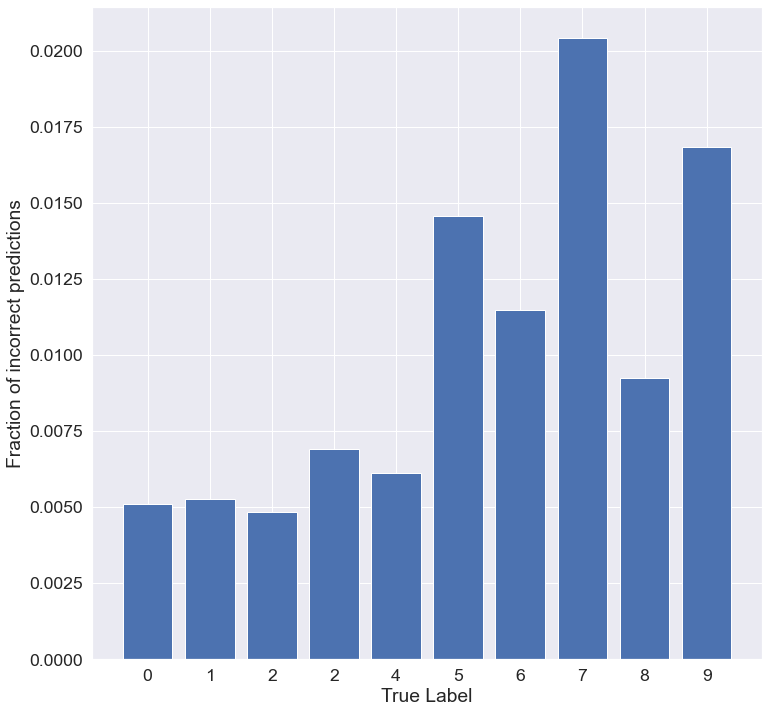

In [22]:
import random

ideal_weights = [0.1, 0.4, 0.01] 

#Use tensordot to sum the products of all elements over specified axes.
ideal_weighted_preds = np.tensordot(preds, ideal_weights, axes=((0),(0)))
ideal_weighted_ensemble_prediction = np.argmax(ideal_weighted_preds, axis=1)

ideal_weighted_accuracy = accuracy_score(y_test, ideal_weighted_ensemble_prediction)



i = random.randint(1,len(ideal_weighted_ensemble_prediction))
plt.imshow(x_test[i,:,:,0]) 
print("Predicted Label: ", class_names[int(ideal_weighted_ensemble_prediction[i])])
print("True Label: ", class_names[int(y_test[i])])

from sklearn.metrics import confusion_matrix
import seaborn as sns

#Print confusion matrix
cm = confusion_matrix(y_test, ideal_weighted_ensemble_prediction)

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)


# PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
fig, ax = plt.subplots(figsize=(12,12))
plt.bar(np.arange(10), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(10), class_names) 